In [1]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
#Get the stock quote
df = pd.read_csv('ethprices.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['date'].values))
#Show the data
df.tail(5)

,symbol,date,close,volume
2021-01-12,ETH/USD,2021-01-12,1049.98,201765.869010
2021-01-13,ETH/USD,2021-01-13,1129.90,144114.808415
2021-01-14,ETH/USD,2021-01-14,1231.08,175493.148589
2021-01-15,ETH/USD,2021-01-15,1168.24,204856.762700
2021-01-16,ETH/USD,2021-01-16,1260.48,97188.825968


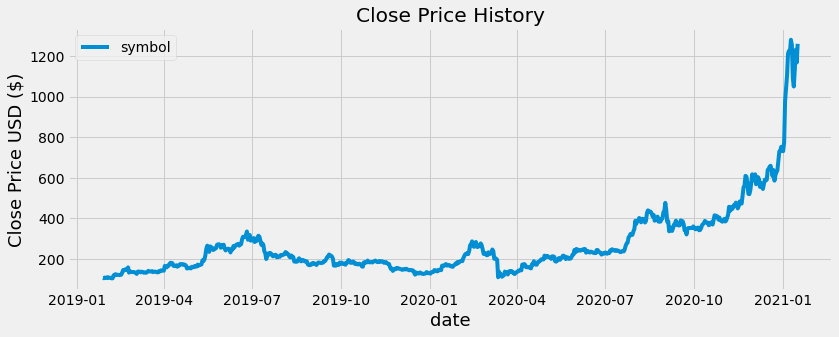

In [3]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [4]:
#Calculate the typical price
typical_price = df["close"]
typical_price

2019-01-28     105.43
2019-01-29     104.01
2019-01-30     107.50
2019-01-31     105.74
2019-02-01     105.69
2019-02-02     109.34
2019-02-03     106.00
2019-02-04     106.03
2019-02-05     106.03
2019-02-06     103.26
2019-02-07     103.32
2019-02-08     118.07
2019-02-09     117.98
2019-02-10     123.98
2019-02-11     119.52
2019-02-12     121.18
2019-02-13     120.58
2019-02-14     119.37
2019-02-15     120.48
2019-02-16     121.51
2019-02-17     132.34
2019-02-18     144.71
2019-02-19     142.84
2019-02-20     147.71
2019-02-21     144.17
2019-02-22     146.94
2019-02-23     157.50
2019-02-24     131.56
2019-02-25     137.54
2019-02-26     135.71
               ...   
2020-12-18     654.67
2020-12-19     658.83
2020-12-20     638.28
2020-12-21     608.01
2020-12-22     637.46
2020-12-23     585.50
2020-12-24     612.49
2020-12-25     626.83
2020-12-26     635.95
2020-12-27     683.03
2020-12-28     729.12
2020-12-29     731.84
2020-12-30     752.50
2020-12-31     737.45
2021-01-01

In [5]:
period =  14 #The typical period used for MFI is 14 days

In [6]:
#Calculate the money flow
money_flow = typical_price * df['volume']
money_flow

2019-01-28    1.232687e+07
2019-01-29    6.059602e+06
2019-01-30    8.619634e+06
2019-01-31    7.160029e+06
2019-02-01    8.499350e+06
2019-02-02    3.516976e+06
2019-02-03    5.115997e+06
2019-02-04    3.189596e+06
2019-02-05    0.000000e+00
2019-02-06    8.084227e+06
2019-02-07    2.646841e+06
2019-02-08    1.378786e+07
2019-02-09    4.027584e+06
2019-02-10    8.096998e+06
2019-02-11    6.463452e+06
2019-02-12    4.578692e+06
2019-02-13    4.699013e+06
2019-02-14    5.158381e+06
2019-02-15    3.020893e+06
2019-02-16    2.634781e+06
2019-02-17    9.221969e+06
2019-02-18    1.981741e+07
2019-02-19    1.311597e+07
2019-02-20    1.132202e+07
2019-02-21    5.779485e+06
2019-02-22    5.921777e+06
2019-02-23    1.403314e+07
2019-02-24    2.150285e+07
2019-02-25    1.209094e+07
2019-02-26    3.689690e+06
                  ...     
2020-12-18    4.493053e+07
2020-12-19    4.333959e+07
2020-12-20    5.526090e+07
2020-12-21    6.616585e+07
2020-12-22    3.707718e+07
2020-12-23    5.633876e+07
2

In [7]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)

In [8]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [9]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([39.15491454, 49.82672723, 43.2239116 , 45.43402071, 53.55960578,
       49.88282709, 54.38382601, 56.97008624, 44.73002961, 51.61082163,
       42.62738587, 44.23605685, 53.288206  , 45.068429  , 57.21666818,
       49.93035716, 50.26661027, 55.22512488, 55.77168254, 53.63359893,
       51.29438761, 46.50312123, 57.74138706, 57.09201308, 57.89305686,
       53.24155097, 53.63260496, 58.52469323, 46.76777131, 57.10146321,
       55.47301643, 51.91686678, 51.19161639, 55.78731826, 53.31024667,
       53.25860556, 51.15856755, 45.25903597, 49.69938106, 56.91010671,
       53.35017815, 53.2979593 , 54.30382621, 52.30830031, 60.41582599,
       53.69472343, 50.12948069, 41.54437588, 45.0732066 , 47.9505513 ,
       47.45385349, 29.23652729, 21.02252276, 27.27145335, 23.47415006,
       31.55564419, 37.07438139, 30.50296964, 32.24883174, 30.4472092 ,
       27.62087977, 27.25737773, 29.5075816 , 28.93484838, 31.01103679,
       38.57047748, 50.13067363, 41.23368803, 47.15130413, 39.66

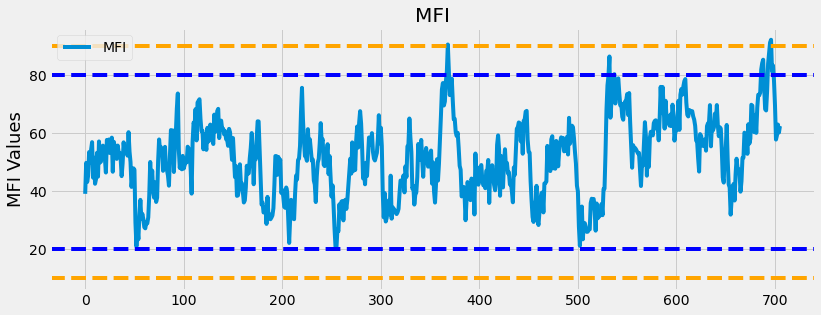

In [10]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [11]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
#Show the new data frame
new_df

,symbol,date,close,volume,MFI
2019-02-11,ETH/USD,2019-02-11,119.52,54078.415096,39.154915
2019-02-12,ETH/USD,2019-02-12,121.18,37784.222171,49.826727
2019-02-13,ETH/USD,2019-02-13,120.58,38970.085878,43.223912
2019-02-14,ETH/USD,2019-02-14,119.37,43213.379277,45.434021
2019-02-15,ETH/USD,2019-02-15,120.48,25073.810810,53.559606
2019-02-16,ETH/USD,2019-02-16,121.51,21683.652982,49.882827
2019-02-17,ETH/USD,2019-02-17,132.34,69683.910752,54.383826
2019-02-18,ETH/USD,2019-02-18,144.71,136945.678593,56.970086
2019-02-19,ETH/USD,2019-02-19,142.84,91822.828630,44.730030
2019-02-20,ETH/USD,2019-02-20,147.71,76650.351697,51.610822


In [12]:
# Create a function to get the buy and sell signals
#MFI above 80 is considered overbought condition and MFI below 20 is considered oversold.
#MFI > 80 then Sell
#MFI < 20 then Buy
def get_signal(data, high, low):
  
    buy_signal = [] #The stock was over sold
    sell_signal = [] #The stock was over bought

    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:#Then the stock is over bought, you should sell 
      
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
        elif data['MFI'][i] < low: #Then the stock is over sold, you should buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
      
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
        
    return (buy_signal, sell_signal)

In [13]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

,symbol,date,close,volume,MFI,Buy,Sell
2019-02-11,ETH/USD,2019-02-11,119.52,54078.415096,39.154915,NaN,NaN
2019-02-12,ETH/USD,2019-02-12,121.18,37784.222171,49.826727,NaN,NaN
2019-02-13,ETH/USD,2019-02-13,120.58,38970.085878,43.223912,NaN,NaN
2019-02-14,ETH/USD,2019-02-14,119.37,43213.379277,45.434021,NaN,NaN
2019-02-15,ETH/USD,2019-02-15,120.48,25073.810810,53.559606,NaN,NaN
2019-02-16,ETH/USD,2019-02-16,121.51,21683.652982,49.882827,NaN,NaN
2019-02-17,ETH/USD,2019-02-17,132.34,69683.910752,54.383826,NaN,NaN
2019-02-18,ETH/USD,2019-02-18,144.71,136945.678593,56.970086,NaN,NaN
2019-02-19,ETH/USD,2019-02-19,142.84,91822.828630,44.730030,NaN,NaN
2019-02-20,ETH/USD,2019-02-20,147.71,76650.351697,51.610822,NaN,NaN


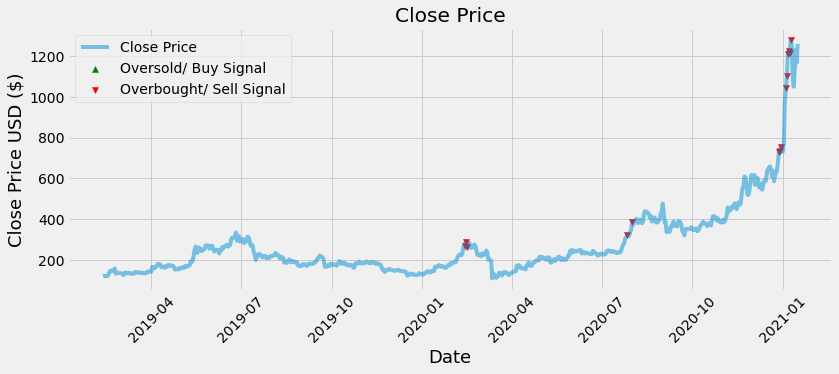

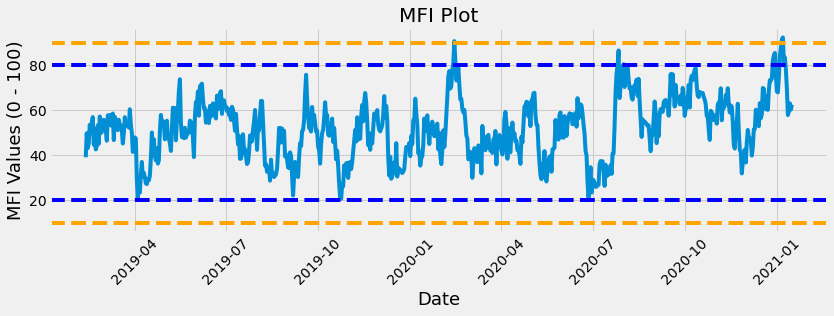

In [14]:
# plot the close price history
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(12.4,3.5))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()

In [15]:
# convert to csv
new_df.to_csv(r"mfi_eth.csv", index = False)